In [1]:
import numpy as np
import scipy
from scipy.misc import imread, imsave, imresize
import skimage
from skimage import data
from matplotlib import pyplot as plt
from skimage.util.shape import view_as_blocks
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import feature
from skimage.transform import warp, AffineTransform
from skimage import io
%matplotlib inline
from PIL import Image
from skimage import img_as_float
from skimage import data
from skimage.transform import pyramid_gaussian

In [7]:
def simple_HOG(img):
#     img=imresize(256,skimage.color.rgb2gray(img))
    img=resize(skimage.color.rgb2gray(img), (256, 256), mode='reflect')
    h=w=15
    plt.figure(figsize=(h, w))
    plt.subplot(131)
    fs=15
    plt.title('original image :',fontsize= fs)
    plt.imshow(img ,cmap='gray')
#     print 'img shape: ',img.shape
    img_v =skimage.filters.sobel_v(img)
    plt.subplot(132)
    plt.title(' Y Gradient image :',fontsize= fs)
    plt.imshow(img_v ,cmap='gray')
   
    img_h =skimage.filters.sobel_h(img)
    plt.subplot(133)
    plt.title(' X Gradient image :',fontsize= fs)
    plt.imshow(img_h ,cmap='gray')
    plt.show()
    
    img_mag_v = np.power(img_v,2) 
    img_mag_h = np.power(img_h,2) 
    
    img_magnitude= np.sqrt(np.add(img_mag_v,img_mag_h))
    # print 'img_magnitude shape: ',img_magnitude.shape
    # print 'mag : ',img_magnitude
    
    Orientation_degree= np.arctan2(img_mag_v,img_mag_h) * 180 / np.pi
    # print 'Orientation_degree shape: ',Orientation_degree.shape
    
    # print 'Orient : ',Orientation_degree
    
    # blk_magnitude=np.empty(img_magnitude.shape,dtype=object)

    blk_magnitude_16_16=view_as_blocks(img_magnitude , block_shape=(16,16))
    
    #  print 'blk mag shape : ',blk_magnitude_16_16.shape
    
    blk_Orientation_degree_16_16=view_as_blocks(Orientation_degree , block_shape=(16,16))
    
    # print 'blk Orientation shape : ',blk_Orientation_degree_16_16.shape
    
    # print 'blk Orientation : ',Orientation_degree_16_16
    
    
    cell_magnitude=np.empty([0])
    
    for x in range (len(blk_magnitude_16_16)):
             for y in range(len(blk_magnitude_16_16)):
                cell_magnitude=view_as_blocks(blk_magnitude_16_16[x,y] , block_shape=(8,8))
                
    # print 'cell_magnitude shape : ',cell_magnitude.shape            
         
        
    
    cell_Orientation_degree=np.empty([0])
    
    for x in range (len(blk_Orientation_degree_16_16)):
             for y in range(len(blk_Orientation_degree_16_16)):
                cell_Orientation_degree=view_as_blocks(blk_Orientation_degree_16_16[x,y] , block_shape=(8,8))              
    #     print 'cell_Orientation_degree shape : ',cell_Orientation_degree.shape     
    
    cell_hist=np.empty([0])
    Histogram_Blocks= np.empty([0])
    for x in range (len(cell_Orientation_degree)):
             for y in range(len(cell_Orientation_degree)):
                # print 'shape of cell_Orient : ',cell_Orientation_degree[x,y].shape
                # print 'shape of cell_Mag : ',cell_magnitude[x,y].shape
                cell_hist,b=np.histogram(cell_Orientation_degree[x,y],bins=9,weights=cell_magnitude[x,y],range=(0,180))
                Histogram_Blocks = np.concatenate((Histogram_Blocks,cell_hist),axis=0) 
        
    norm=np.linalg.norm(Histogram_Blocks)
    Block_descriptor= Histogram_Blocks/norm
                
    #     print 'Hist of cell shape',cell_hist.shape
    #     print 'Histogram of descriptor shape',Block_descriptor.shape
     
    hog_descriptor=np.empty([0])
    for i in range(len(blk_Orientation_degree_16_16)):
        for j in range(len(blk_Orientation_degree_16_16)):
            hog_descriptor= np.concatenate((hog_descriptor,Block_descriptor),axis=0)  
    
       

    return hog_descriptor

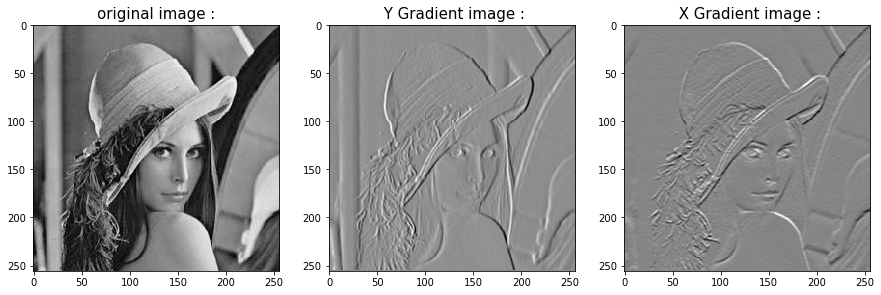

 Hog Descriptor :   (9216L,)
 Hog Descriptor :   [ 0.03689582  0.03374274  0.11422217 ...,  0.          0.          0.        ]


In [8]:
############################################
# Group 10
# Image Processing PS Assignments EX sheet 6
# Group members :
# 1. Omid Ghorbanzadeh 
# 2. Martina Lassakova
# 3.Lixia Chu 
############################################


# Test Function 
img =io.imread('../images/Lenna.jpg')
myHOG=simple_HOG(img)

print ' Hog Descriptor :  ',myHOG.shape 
print ' Hog Descriptor :  ',myHOG


__Bonus__

In [4]:
from scipy.spatial import distance

In [5]:
images=[]
threshold= 12

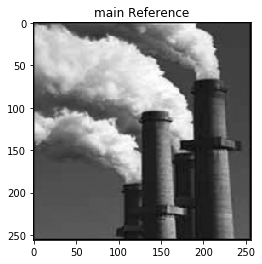

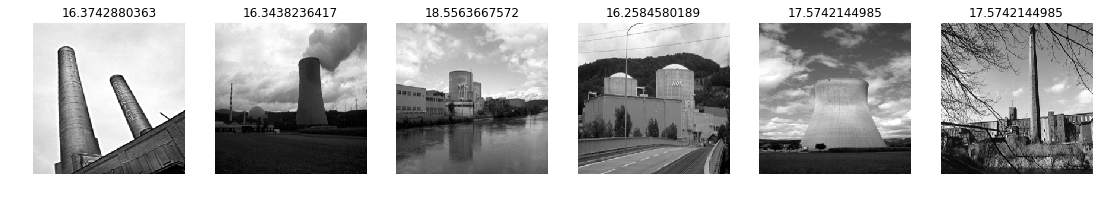

In [6]:
hog_des_imgs=[]
src=[]

url= '../Gallery_IP_HOG'
for i in range(1,15):
    path = url+'/'+str(i)+'.jpg'
    src.append(path)

main_Refrence_image=src[0]  

# plt.subplot(1,1,1)
# plt.figure(figsize=(5,5))
plt.title('main Reference')
main_Refrence_image=io.imread(main_Refrence_image)
main_Refrence_image=skimage.color.rgb2gray(main_Refrence_image)
main_Refrence_image=resize(main_Refrence_image, (256, 256), mode='reflect')
main_Refrence_image=img_as_float(main_Refrence_image)
plt.imshow(main_Refrence_image,'gray')
plt.show()
HOG_main_Reference = simple_HOG(main_Refrence_image)

############

def myplot(img,title, row_index, col_index, plot_nr):
    plt.subplot(row_index, col_index, plot_nr)
    plt.axis('off')    
    plt.title(title)
    plt.imshow(img,cmap='gray')

#############


for i in range(0,len(src)):
    img=io.imread(src[i])
    img=img_as_float(img)
    img=resize(skimage.color.rgb2gray(img), (256, 256), mode='reflect')
    tup_of_img_and_hog_des=([src[i],simple_HOG(img)]) 
    hog_des_imgs.append(tup_of_img_and_hog_des)
    
 

plt.figure(figsize=(45,45))
cnt=0
for i in range(14):
    distance=scipy.spatial.distance.euclidean(HOG_main_Reference, hog_des_imgs[i][1])

    if distance > 16 :
        plt.title(str(distance))
        img=io.imread(hog_des_imgs[i][0])
        img=skimage.color.rgb2gray(img)
        img=resize(img, (256, 256), mode='reflect')
        img=img_as_float(img)
        cnt=1+cnt
        myplot(img,str(distance),1,14,cnt)
        
plt.show()

    
  
    